1)https://github.com/christopherjenness/DBCV

2)https://github.com/FelSiq/DBCV

3) # Calcolo della metrica DBCV
dbcv_score = hdbscan.validity.validity_index(data, cluster_labels)

4)DBCV = (1 / n) * sum_{i=1}^n (sum_{j=1}^n (d(i,j) / max{d(i,k), k!=j}))



#**Library**

In [ ]:
pip install numpy scikit-learn hdbscan matplotlib

In [ ]:
pip install "git+https://github.com/FelSiq/DBCV"

  Cloning https://github.com/FelSiq/DBCV to /tmp/pip-req-build-rk4q1d12
  Running command git clone --filter=blob:none --quiet https://github.com/FelSiq/DBCV /tmp/pip-req-build-rk4q1d12
  Resolved https://github.com/FelSiq/DBCV to commit 078fc5e0c521c1b686a32eb7f74abdf326d9a832
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#pip install "git+https://github.com/christopherjenness/DBCV"

In [ ]:
import pkg_resources

# Lista delle librerie di cui vuoi stampare le versioni
libraries = [
    'numpy',
    'scikit-learn',
    'matplotlib',
    'hdbscan',
    'scipy',
    'DBCV',
    'pandas',
    'seaborn',
    'dbcv'# Questo potrebbe non essere trovato se il modulo è installato in un altro modo
]

# Funzione per ottenere e stampare le versioni
def print_library_versions(libraries):
    for lib in libraries:
        try:
            version = pkg_resources.get_distribution(lib).version
            print(f'{lib}: {version}')
        except pkg_resources.DistributionNotFound:
            print(f'{lib}: not installed')

# Stampa le versioni
print_library_versions(libraries)

numpy: 1.26.4
scikit-learn: 1.3.2
matplotlib: 3.7.1
hdbscan: 0.8.38.post1
scipy: 1.13.1
DBCV: 0.1.0
pandas: 2.1.4
seaborn: 0.13.1
dbcv: 0.1.0


In [ ]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan
import time
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
#from DBCV import DBCV
from dbcv import dbcv
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#**Function**

In [ ]:
def calculate_dbcv_math(X, labels):
    n = len(X)
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return -1  # Se ci sono meno di 2 cluster, il DBCV non è definito

    distances = np.sqrt(((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=2))

    dbcv_sum = 0
    for i in range(n):
        internal_sum = 0
        for j in range(n):
            if i != j:
                max_dik = max(distances[i, k] for k in range(n) if k != j)
                internal_sum += distances[i, j] / max_dik
        dbcv_sum += internal_sum / n

    dbcv = dbcv_sum / n
    return dbcv

In [ ]:
def generate_datasets():
    datasets = []

    X1, _ = make_moons(n_samples=10000, noise=0.0, random_state=0)
    datasets.append(X1)

    X2, _ = make_moons(n_samples=10000, noise=0.056, random_state=0)
    datasets.append(X2)

    X3, _ = make_moons(n_samples=10000, noise=0.111, random_state=0)
    datasets.append(X3)

    X4, _ = make_moons(n_samples=10000, noise=0.167, random_state=0)
    datasets.append(X4)

    X5, _ = make_moons(n_samples=10000, noise=0.222, random_state=0)
    datasets.append(X5)

    X6, _ = make_moons(n_samples=10000, noise=0.278, random_state=0)
    datasets.append(X6)

    X7, _ = make_moons(n_samples=10000, noise=0.333, random_state=0)
    datasets.append(X7)

    X8, _ = make_moons(n_samples=10000, noise=0.389, random_state=0)
    datasets.append(X8)

    X9, _ = make_moons(n_samples=10000, noise=0.444, random_state=0)
    datasets.append(X9)

    X10, _ = make_moons(n_samples=10000, noise=0.5, random_state=0)
    datasets.append(X10)

    return datasets

In [ ]:
def find_best_params(results):
    param_dbvcs = {}

    for dataset_results in results:
        for min_samples, epsilon, dbcv_score, labels in dataset_results:
            param_key = (min_samples, epsilon)
            if param_key not in param_dbvcs:
                param_dbvcs[param_key] = []
            param_dbvcs[param_key].append(dbcv_score)

    param_avg_dbcv = {k: np.mean(v) for k, v in param_dbvcs.items()}

    best_params = max(param_avg_dbcv, key=param_avg_dbcv.get)

    return best_params

In [ ]:
def plot_best_results(datasets, results, best_params):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    min_samples, epsilon = best_params

    for i, (X, dataset_results) in enumerate(zip(datasets, results)):
        for min_samples_, epsilon_, dbcv_score, labels in dataset_results:
            if (min_samples_, epsilon_) == best_params:
                ax = axs[i // 5, i % 5]
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
                ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv={dbcv_score:.3f}')
                ax.set_xticks([])
                ax.set_yticks([])
                break

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_results(datasets, results):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))

    for i, (X, (dbcv_score, labels)) in enumerate(zip(datasets, results)):
        ax = axs[i // 5, i % 5]
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
        ax.set_title(f'σ={0.056*i:.3f}\ndbcv={dbcv_score:.3f}')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

In [ ]:
def calculate_dunn_index(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return -1

    distances = np.sqrt(((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=2))
    min_intercluster_distances = np.inf
    for label_i in unique_labels:
        cluster_i = X[labels == label_i]
        for label_j in unique_labels:
            if label_i != label_j:
                cluster_j = X[labels == label_j]
                intercluster_distances = np.min(distances[np.ix_(labels == label_i, labels == label_j)])
                min_intercluster_distances = min(min_intercluster_distances, intercluster_distances)
    max_intracluster_distances = 0
    for label in unique_labels:
        cluster = X[labels == label]
        intracluster_distances = np.max(distances[np.ix_(labels == label, labels == label)])
        max_intracluster_distances = max(max_intracluster_distances, intracluster_distances)
    return min_intercluster_distances / max_intracluster_distances



In [ ]:
def plot_best_results_compare(datasets, results, best_params):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    min_samples, epsilon = best_params

    for i, (X, dataset_results) in enumerate(zip(datasets, results)):
        for min_samples_, epsilon_, dbcv_score, silhouette, dunn_index, davies_bouldin, calinski_harabasz, labels in dataset_results:
            if (min_samples_, epsilon_) == best_params:
                ax = axs[i // 5, i % 5]
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
                ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv={dbcv_score:.3f}\nsilhouette={silhouette:.3f}\ndunn={dunn_index:.3f}\ndavies={davies_bouldin:.3f}\ncalinski={calinski_harabasz:.3f}')
                ax.set_xticks([])
                ax.set_yticks([])
                break

    plt.tight_layout()
    plt.show()

In [ ]:
def grid_search_hdbscan(X, min_cluster_size_range, cluster_selection_epsilon_range):
    best_score = -np.inf
    best_params = {'min_cluster_size': None, 'cluster_selection_epsilon': None}
    for min_cluster_size in min_cluster_size_range:
        for cluster_selection_epsilon in cluster_selection_epsilon_range:
            clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                        cluster_selection_epsilon=cluster_selection_epsilon)
            labels = clusterer.fit_predict(X)

            if len(set(labels)) > 1:
                score = dbcv(X, labels)

                if score > best_score:
                    best_score = score
                    best_params['min_cluster_size'] = min_cluster_size
                    best_params['cluster_selection_epsilon'] = cluster_selection_epsilon

    print(f"\nBest DBCV Score: {best_score:.4f}")
    print(f"Best Parameters: min_cluster_size = {best_params['min_cluster_size']}, cluster_selection_epsilon = {best_params['cluster_selection_epsilon']}")

    return best_params


#**Parameter validation**

[(1, 0.01, 0.9883534093867475, array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0

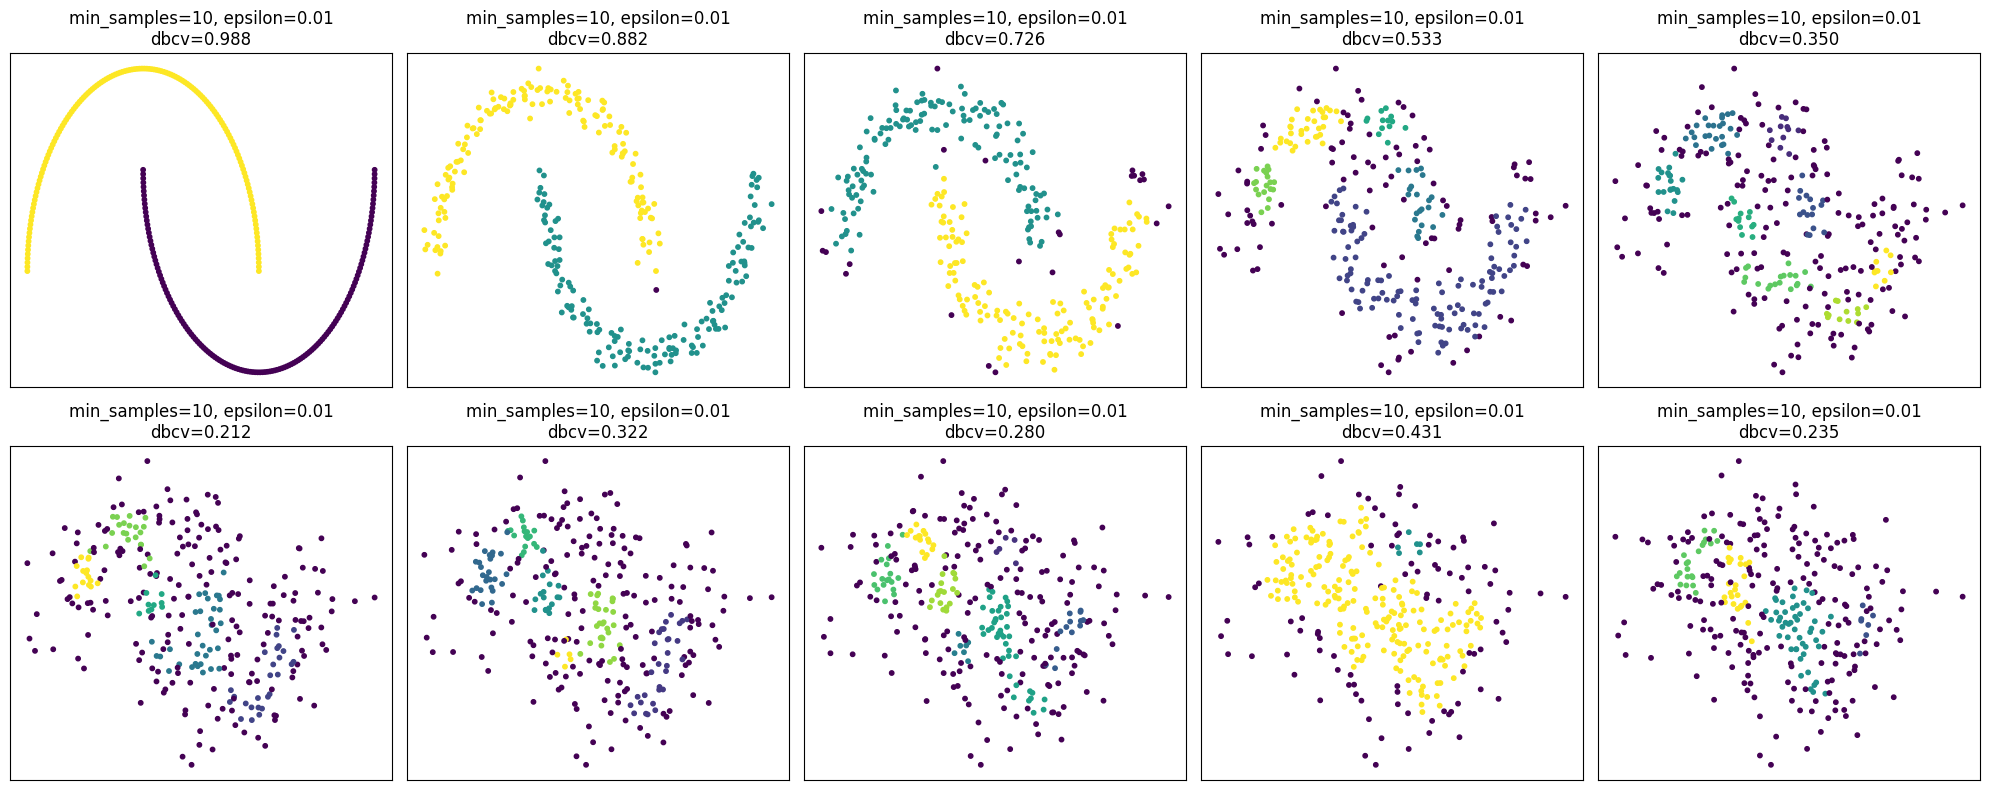

Tempo totale di esecuzione: 17.46 secondi


In [ ]:
def analyze_datasets(datasets):
    results = []
    param_grid = {
        'min_samples': [1, 5, 10, 50],
        'cluster_selection_epsilon': [0.01, 0.1, 0.2, 0.5]
    }

    for X in datasets:
        dataset_results = []

        for min_samples in param_grid['min_samples']:
            for epsilon in param_grid['cluster_selection_epsilon']:
                clusterer = hdbscan.HDBSCAN(min_samples=min_samples, cluster_selection_epsilon=epsilon)
                labels = clusterer.fit_predict(X)
                dbcv_score = dbcv(X, labels)
                dataset_results.append((min_samples, epsilon, dbcv_score,labels))

        results.append(dataset_results)

    return results

start_time = time.time()
datasets = generate_datasets()
results = analyze_datasets(datasets)
best_params = find_best_params(results)
plot_best_results(datasets, results, best_params)
end_time = time.time()

print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**DBCV punto 1**

Punto 1 e 2 sono uguali, semplicmente nel due hai la possibilità di utilizzare processi paralleli e l'utilizzo di dynamically-adjustable high precision computation che però non migliorano i risultati

/usr/local/lib/python3.10/dist-packages/DBCV/DBCV.py:58: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.10/dist-packages/DBCV/DBCV.py:217: RuntimeWarning: invalid value encountered in scalar divide


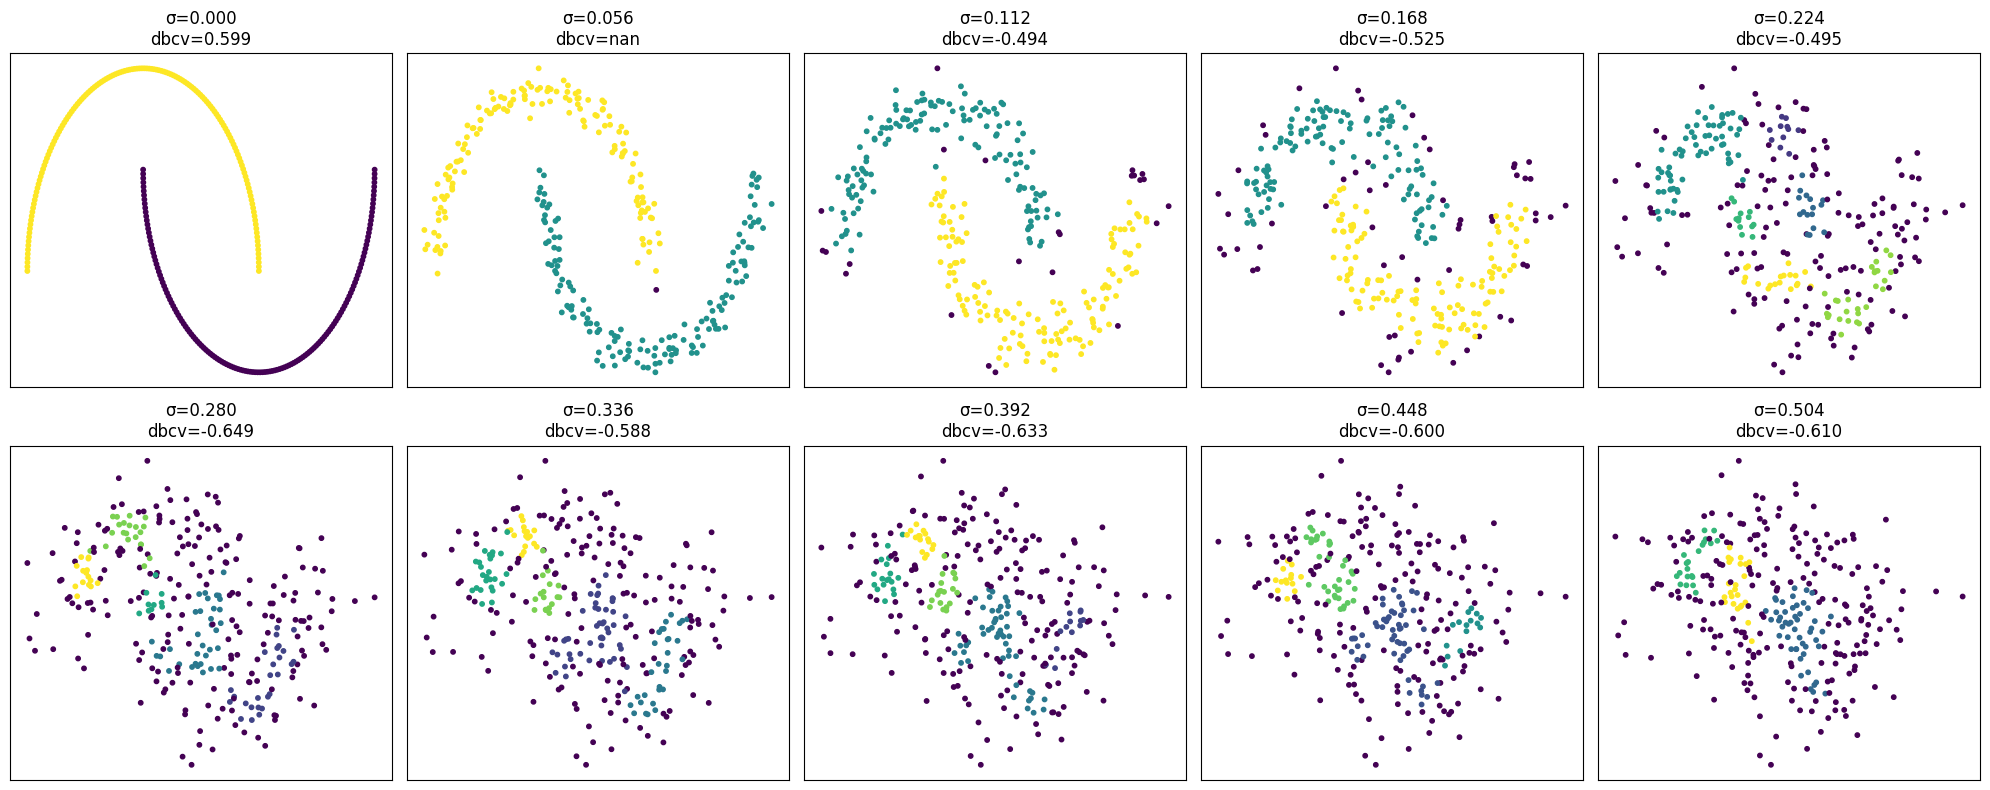

Tempo totale di esecuzione: 93.43 secondi


In [ ]:
def analyze_datasets(datasets):
    results = []

    for X in datasets:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_epsilon=0.01)
        labels = clusterer.fit_predict(X)
        dbcv_score = DBCV(X, labels, dist_function=euclidean)
        results.append((dbcv_score, labels))

    return results


start_time = time.time()
datasets = generate_datasets()
results = analyze_datasets(datasets)
plot_results(datasets, results)
end_time = time.time()

print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**DBCV punto 2**

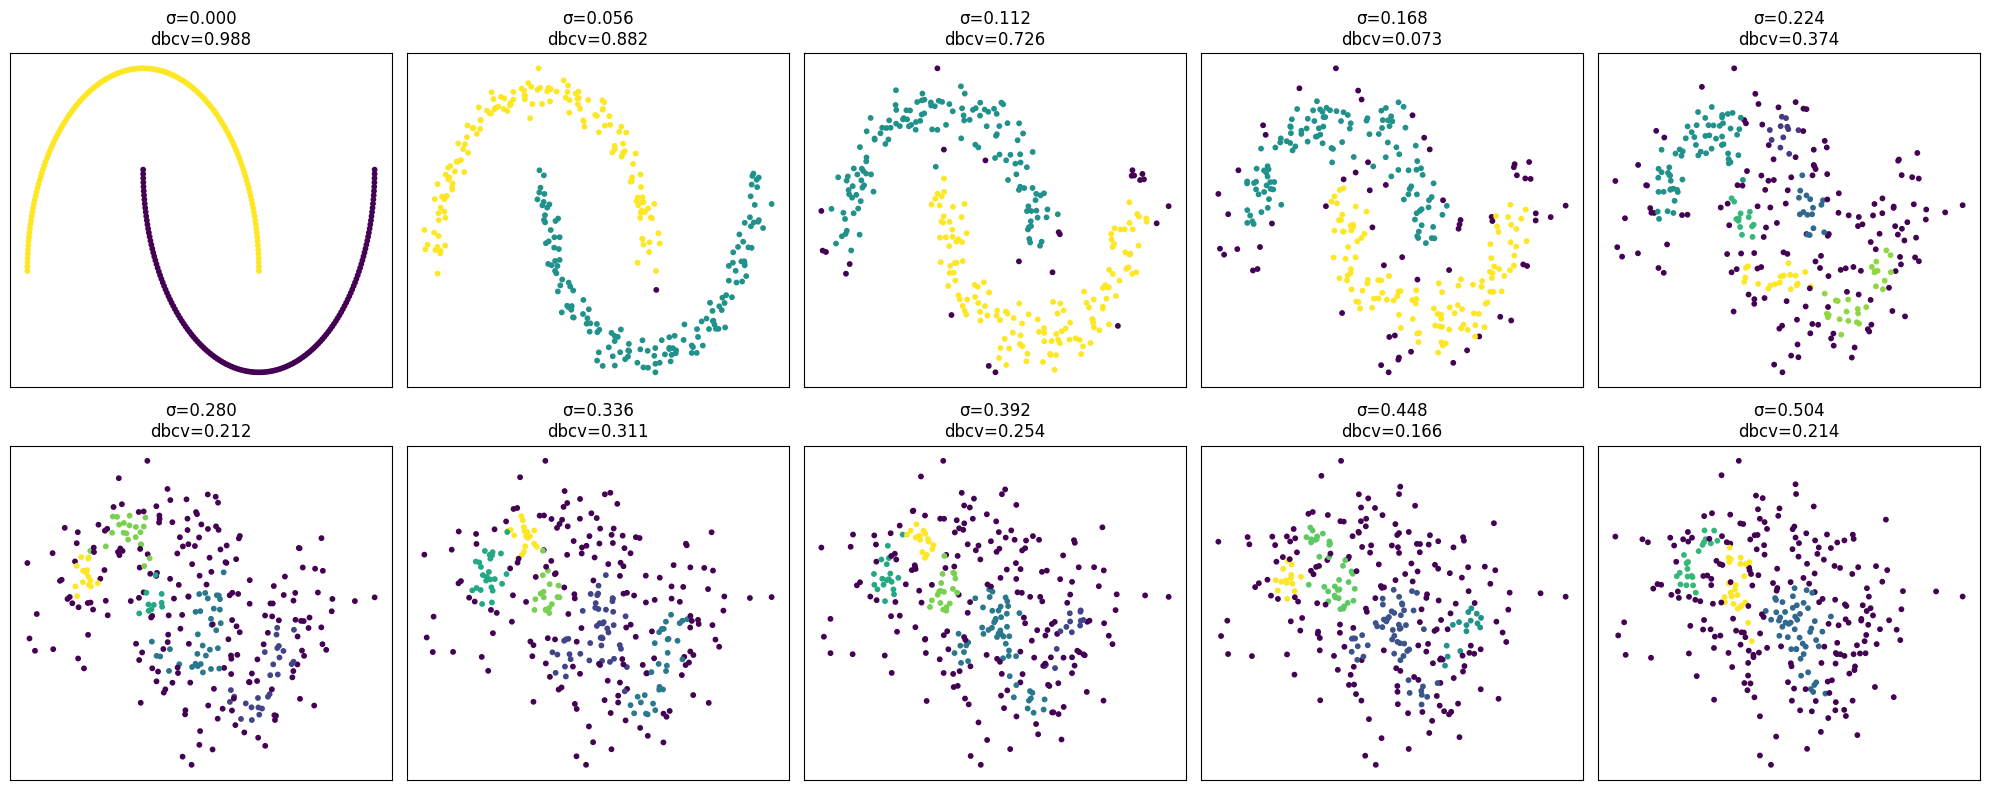

Tempo totale di esecuzione: 2.20 secondi


In [ ]:
def analyze_datasets(datasets):
    results = []

    for X in datasets:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_epsilon=0.01)
        labels = clusterer.fit_predict(X)
        dbcv_score = dbcv(X, labels, n_processes=2)
        results.append((dbcv_score, labels))

    return results


start_time = time.time()
datasets = generate_datasets()
results = analyze_datasets(datasets)
plot_results(datasets, results)
end_time = time.time()

print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**DBCV punto 3**

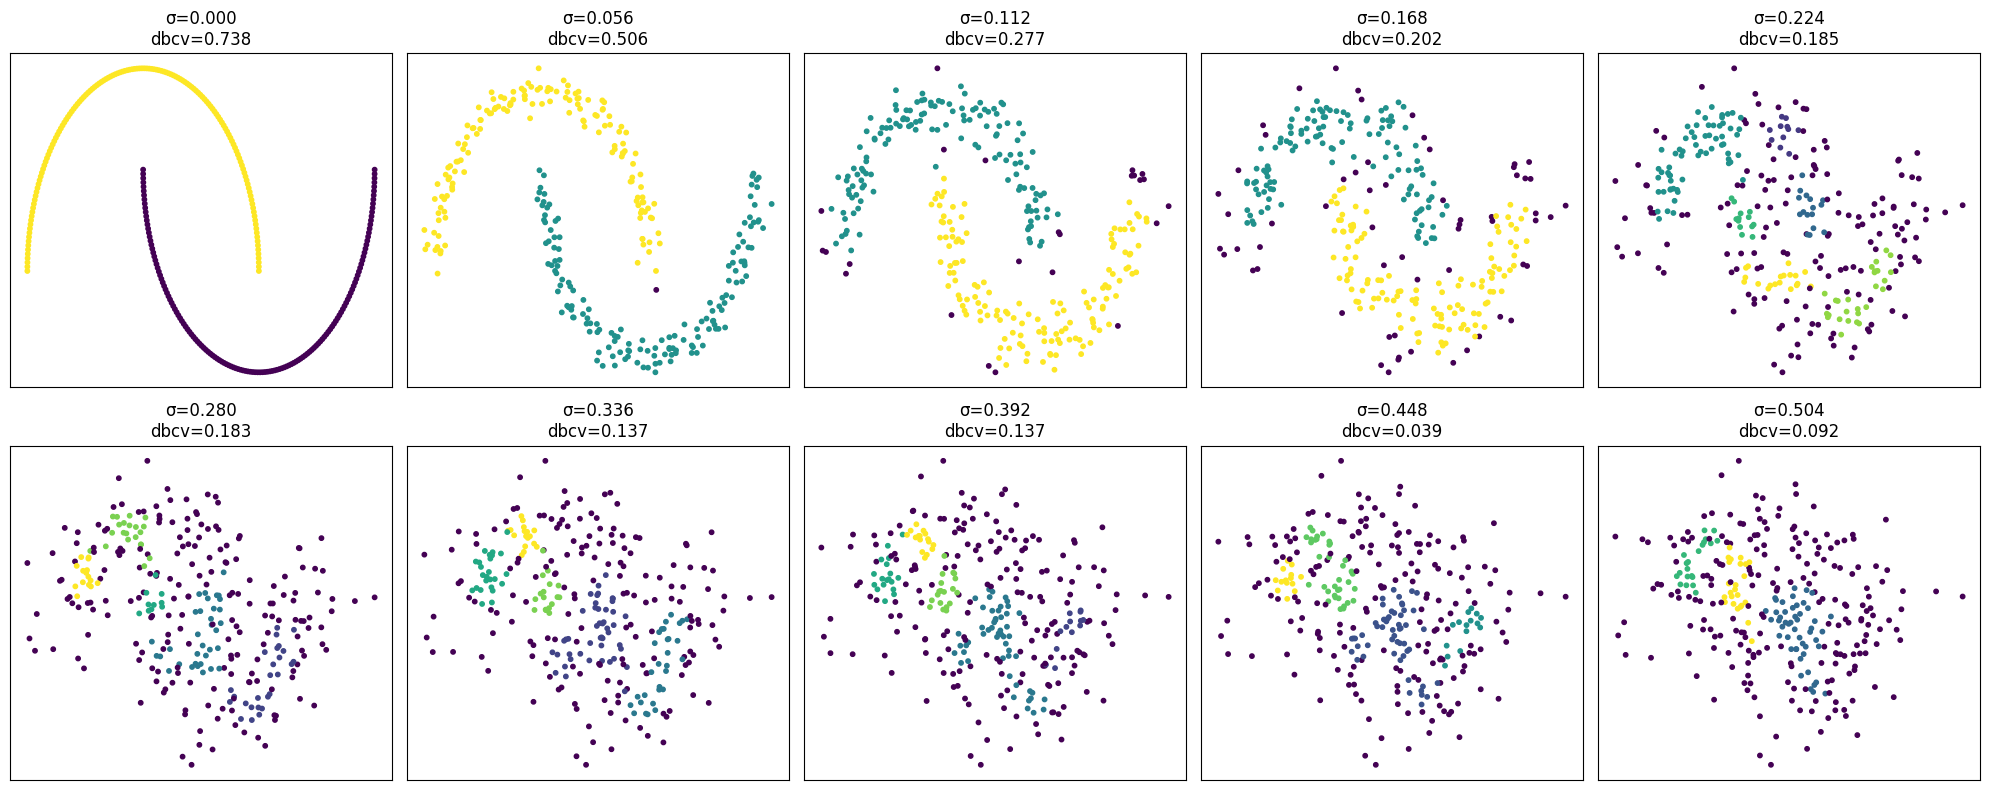

Tempo totale di esecuzione: 1.06 secondi


In [ ]:
def analyze_datasets(datasets):
    results = []

    for X in datasets:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_epsilon=0.01)
        labels = clusterer.fit_predict(X)
        dbcv = hdbscan.validity.validity_index(X, labels)
        results.append((dbcv, labels))

    return results

start_time = time.time()
datasets = generate_datasets()
results = analyze_datasets(datasets)
plot_results(datasets, results)
end_time = time.time()

print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**DBCV Punto 4**

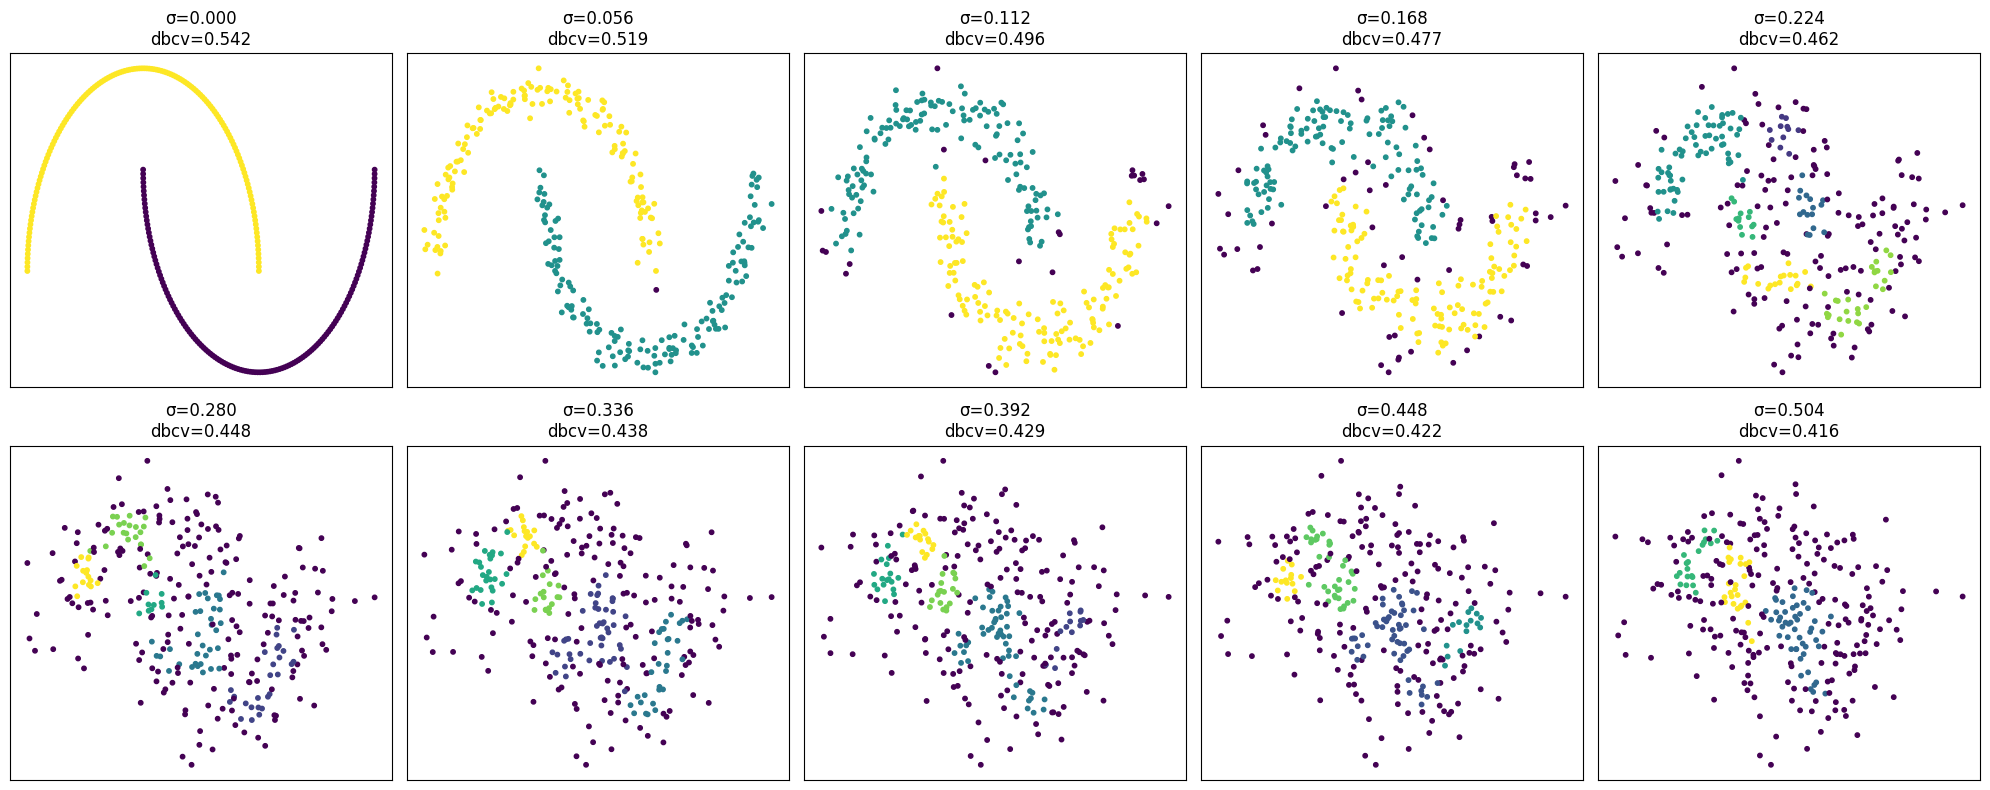

Tempo totale di esecuzione: 75.40 secondi


In [ ]:
def analyze_datasets(datasets):
    results = []

    for X in datasets:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=10,cluster_selection_epsilon=0.01)
        labels = clusterer.fit_predict(X)
        dbcv = calculate_dbcv_math(X, labels)
        results.append((dbcv, labels))

    return results

start_time = time.time()
datasets = generate_datasets()
results = analyze_datasets(datasets)
plot_results(datasets, results)
end_time = time.time()

print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**DBCV con varie metriche**

[[ 1.92858718  0.12888568]
 [ 0.84494023  0.53486073]
 [ 0.06374384  0.99796629]
 ...
 [-0.46217438  0.88678906]
 [ 1.99532043  0.4033706 ]
 [-0.14559394  0.98934443]]
[[ 1.95332685  0.0682399 ]
 [ 0.8838998   0.52253577]
 [ 0.02799195  1.05648885]
 ...
 [-0.51329567  0.8539308 ]
 [ 1.98493725  0.35847876]
 [-0.14627971  0.97359975]]
[[ 1.97762473  0.00867709]
 [ 0.92216367  0.5104309 ]
 [-0.00712152  1.11396636]
 ...
 [-0.56350408  0.82165928]
 [ 1.97473949  0.31438855]
 [-0.14695324  0.95813623]]
[[ 2.0023644  -0.05196869]
 [ 0.96112323  0.49810594]
 [-0.04287342  1.17248891]
 ...
 [-0.61462537  0.78880101]
 [ 1.96435631  0.26949671]
 [-0.14763902  0.94239155]]
[[ 2.02666228 -0.11153151]
 [ 0.9993871   0.48600108]
 [-0.07798689  1.22996642]
 ...
 [-0.66483379  0.7565295 ]
 [ 1.95415854  0.22540651]
 [-0.14831255  0.92692802]]
[[ 2.05140195 -0.17217728]
 [ 1.03834667  0.47367612]
 [-0.11373878  1.28848898]
 ...
 [-0.71595508  0.72367123]
 [ 1.94377537  0.18051467]
 [-0.14899833  0.911

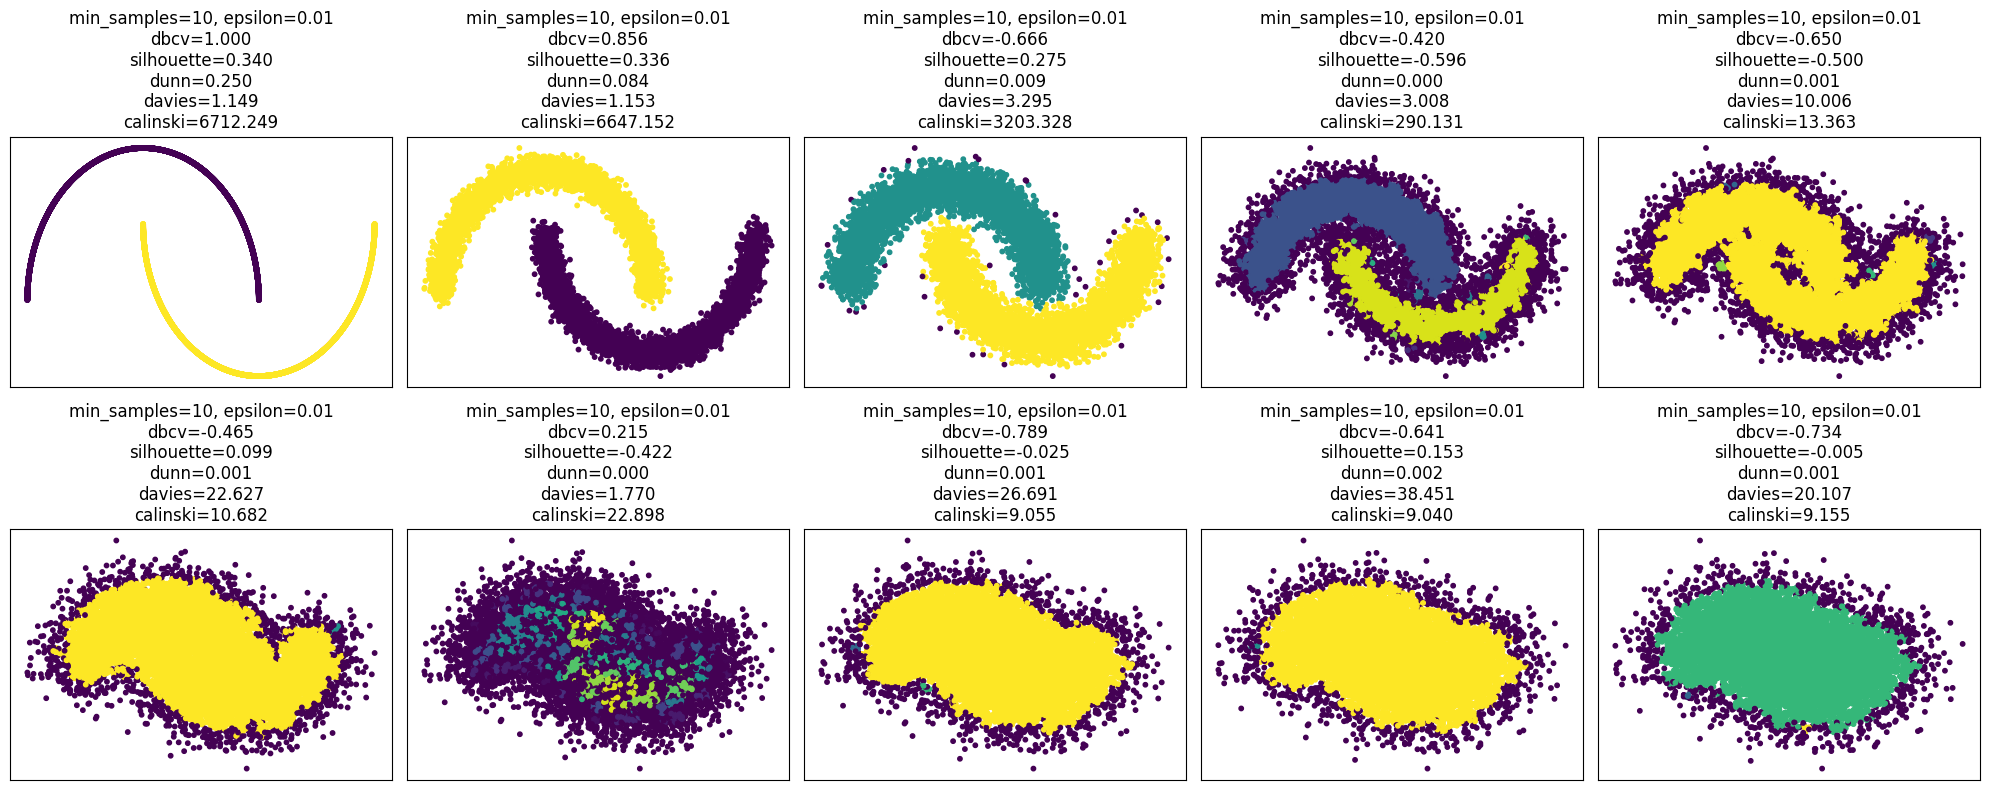

Tempo totale di esecuzione: 456.10 secondi


In [ ]:
def analyze_datasets(datasets):
    results = []
    param_grid = {
        'min_samples': [10],
        'cluster_selection_epsilon': [0.01]
    }

    for X in datasets:
        dataset_results = []
        print(X)
        for min_samples in param_grid['min_samples']:
            for epsilon in param_grid['cluster_selection_epsilon']:
                clusterer = hdbscan.HDBSCAN(min_samples=min_samples, cluster_selection_epsilon=epsilon)
                labels = clusterer.fit_predict(X)

                dbcv_score = dbcv(X, labels)
                silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
                dunn_index = calculate_dunn_index(X, labels)
                davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
                calinski_harabasz = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1

                dataset_results.append((min_samples, epsilon, dbcv_score, silhouette, dunn_index, davies_bouldin, calinski_harabasz,labels))

        results.append(dataset_results)

    return results

start_time = time.time()
datasets = generate_datasets()
results = analyze_datasets(datasets)
#best_params = find_best_params(results)
plot_best_results_compare(datasets, results, best_params)
end_time = time.time()

print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**Real experiment**

In [ ]:
neuroblastoma=pd.read_csv("/content/10_7717_peerj_5665_dataYM2018_neuroblastoma.csv")
diabetes=pd.read_csv("/content/Takashi2019_diabetes_type1_dataset_preprocessed.csv")
sepsis=pd.read_csv("/content/journal.pone.0148699_S1_Text_Sepsis_SIRS_EDITED.csv")
heart_failure=pd.read_csv("/content/journal.pone.0158570_S2File_depression_heart_failure.csv")
cardiac_arrest=pd.read_csv("/content/journal.pone.0175818_S1Dataset_Spain_cardiac_arrest_EDITED..csv")

In [ ]:
min_cluster_size_range = [3, 5, 10, 15, 20, 30]
cluster_selection_epsilon_range = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]

#**Neuroblastoma**

Il dataset fornito sembra essere uno studio retrospettivo su pazienti con neuroblastoma, una forma di tumore infantile. Ecco una spiegazione delle colonne del dataset e di cosa ciascuna rappresenta:

age: Indica l'età del paziente al momento della diagnosi

sex: Rappresenta il sesso del paziente

site: Potrebbe rappresentare il sito anatomico primario del tumore, codificato con numeri per differenti localizzazioni.

stage: Stadio del neuroblastoma al momento della diagnosi. Lo stadio di un tumore rappresenta la gravità e l'estensione della malattia.

risk: Questa colonna indica il livello di rischio associato alla malattia del paziente.

time_months: Rappresenta la durata del follow-up o il tempo trascorso fino a un evento (come la recidiva o la morte).

autologous_stem_cell_transplantation: Indica se il paziente ha ricevuto un trapianto autologo di cellule staminali, una forma di trattamento.

radiation: Questa colonna indica se il paziente ha ricevuto radioterapia come parte del trattamento.

degree_of_differentiation: Rappresenta il grado di differenziazione del tumore, che indica quanto le cellule tumorali somigliano alle cellule normali. Valori più bassi indicano un tumore meno differenziato e più aggressivo.

UH_or_FH: Questa colonna si riferisce allo stato di "Unfavorable Histology" (UH) o "Favorable Histology" (FH), che sono categorie usate per classificare il tipo di tessuto tumorale basato sulla prognosi.

MYCN_status: MYCN è un oncogene che, quando amplificato, è associato a una prognosi peggiore nel neuroblastoma.

surgical_methods: Indica il tipo o l'estensione della chirurgia eseguita.

outcome: Questa colonna rappresenta l'esito relativo al paziente

<ipython-input-21-4d1d20ec59ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuroblastoma['outcome'] = neuroblastoma['outcome'].astype(int)


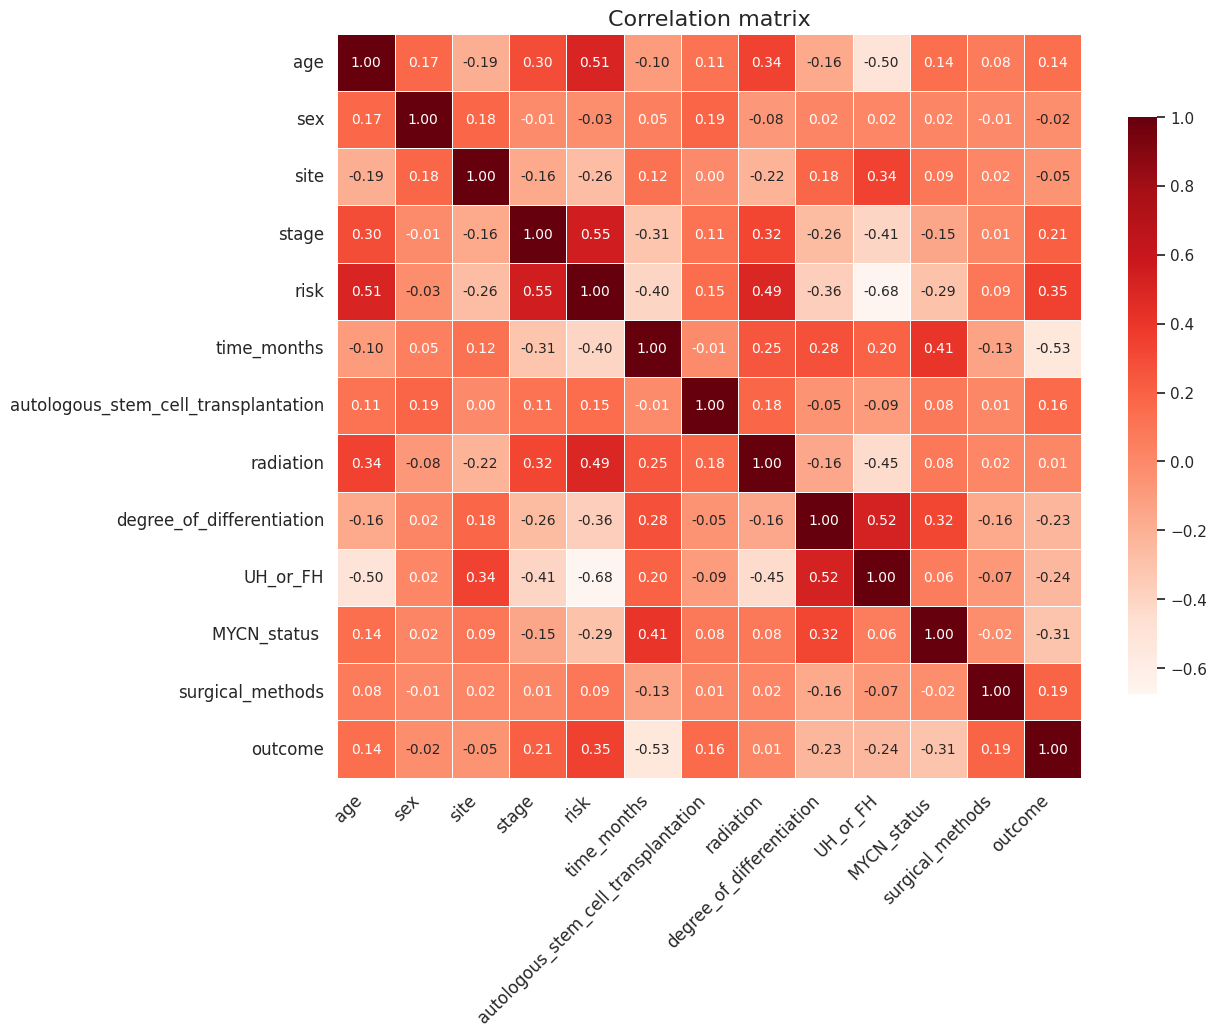

<ipython-input-21-4d1d20ec59ea>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Outcome', y='Frequenza', data=outcome_df, palette='viridis', edgecolor='black')


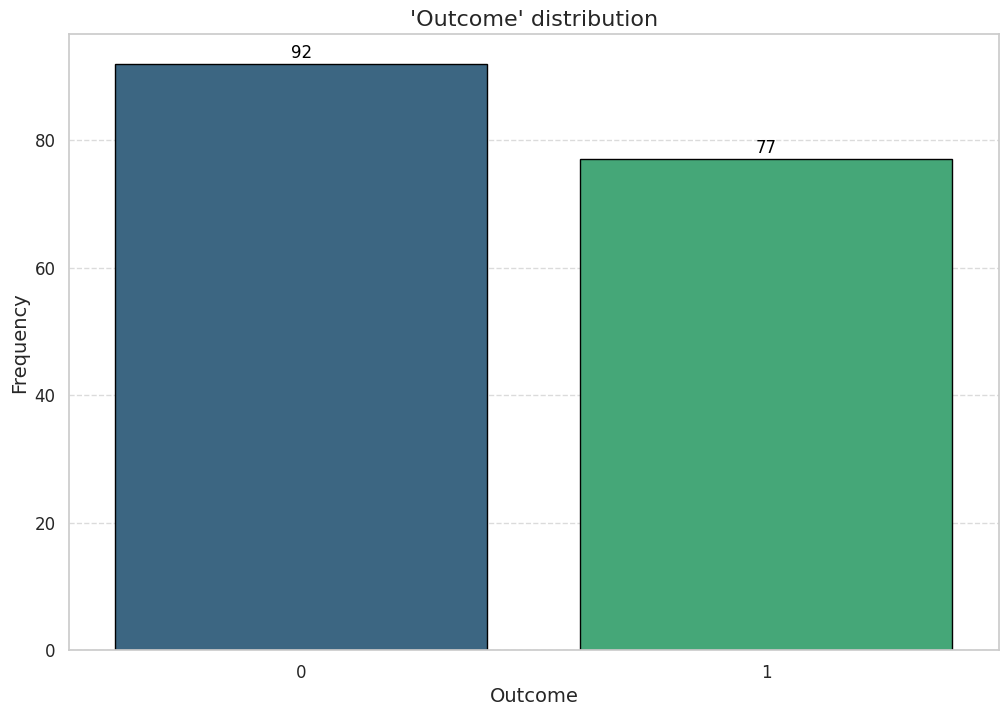

In [ ]:
neuroblastoma = neuroblastoma.dropna(thresh=neuroblastoma.shape[1] - 2)
neuroblastoma['outcome'] = neuroblastoma['outcome'].astype(int)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(neuroblastoma.corr(), annot=True, cmap='Reds',
            annot_kws={"size": 10}, linewidths=.5, fmt='.2f',
            square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.show()


outcome_counts = neuroblastoma['outcome'].value_counts().sort_index()

outcome_df = pd.DataFrame({
    'Outcome': outcome_counts.index,
    'Frequenza': outcome_counts.values
})

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Outcome', y='Frequenza', data=outcome_df, palette='viridis', edgecolor='black')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 8),
                     textcoords = 'offset points',
                     fontsize=12, color='black')

plt.title("'Outcome' distribution", fontsize=16)
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Best DBCV Score: 0.8178
Best Parameters: min_cluster_size = 10, cluster_selection_epsilon = 0.01
DBCV Score with PCA: 0.763


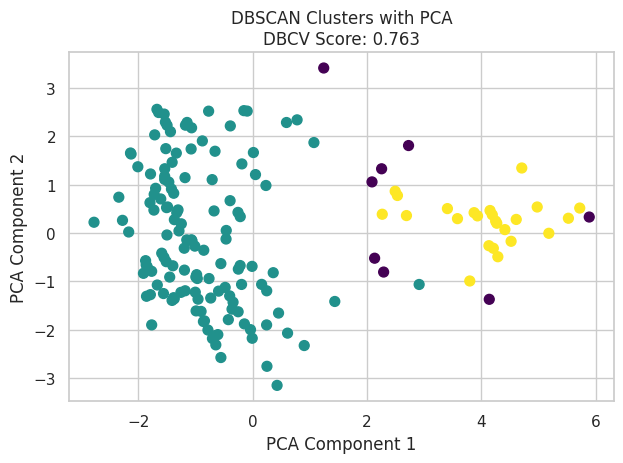

In [ ]:
neuroblastoma=neuroblastoma.drop(neuroblastoma.index[70])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(neuroblastoma)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

best_params = grid_search_hdbscan(X_pca, min_cluster_size_range, cluster_selection_epsilon_range)

dbscan_pca = hdbscan.HDBSCAN(min_cluster_size=best_params['min_cluster_size'], cluster_selection_epsilon=best_params['cluster_selection_epsilon'])
clusters_pca = dbscan_pca.fit_predict(X_pca)

X_pca_unique, unique_indices = np.unique(X_pca, axis=0, return_index=True)
clusters_pca_unique = clusters_pca[unique_indices]
duplicated_indices = np.setdiff1d(np.arange(X_pca.shape[0]), unique_indices)

neuroblastoma['cluster_dbscan_pca'] = clusters_pca_unique

if len(set(clusters_pca)) > 1:
    dbcv_score_pca = dbcv(X_pca_unique, clusters_pca_unique)
    print(f"DBCV Score with PCA: {dbcv_score_pca:.3f}")
else:
    print("Only one cluster found with PCA, DBCV score is not applicable.")

plt.scatter(X_pca_unique[:, 0], X_pca_unique[:, 1], c=clusters_pca_unique, cmap='viridis', s=50)
plt.title(f'DBSCAN Clusters with PCA\nDBCV Score: {dbcv_score_pca:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


#**Diabetes**

Il dataset sembra contenere dati relativi a pazienti con diabete di tipo 1. Di seguito la spiegazione delle colonne presenti:

age: L'età del paziente in anni.

duration.of.diabetes: La durata del diabete in anni, ossia il tempo trascorso dalla diagnosi del diabete di tipo 1.

body_mass_index: L'indice di massa corporea (BMI) del paziente

TDD : La dose totale giornaliera di insulina

basal: La quantità di insulina basale, che è la dose di insulina a lunga durata d'azione che il paziente assume per mantenere un livello di glucosio stabile tra i pasti e durante la notte.

bolus: La quantità di insulina bolus, che è la dose di insulina a breve durata d'azione assunta per coprire l'assunzione di carboidrati durante i pasti o per correggere alti livelli di glucosio nel sangue.

HbA1c: Il livello di emoglobina glicata, un indicatore del controllo glicemico nel lungo periodo espresso come percentuale.

eGFR  Il tasso di filtrazione glomerulare stimato, un indicatore della funzionalità renale, espresso in ml/min/1,73 m².

perc.body.fat: La percentuale di grasso corporeo del paziente, che rappresenta la proporzione di grasso rispetto al peso totale del corpo.

adiponectin: Il livello di adiponectina, un ormone prodotto dal tessuto adiposo che è coinvolto nella regolazione del glucosio e della degradazione degli acidi grassi.

free.testosterone: Il livello di testosterone libero nel sangue, che può essere importante per valutare la funzione endocrina, specialmente nei pazienti con diabete.

SMI: L'indice di massa muscolare scheletrica, che misura la quantità di massa muscolare in relazione all'altezza o al peso.

grip.strength: La forza di presa della mano del paziente, un indicatore della forza muscolare complessiva.

knee.extension.strength: La forza di estensione del ginocchio, un'altra misura della forza muscolare, particolarmente delle gambe.

gait.speed: La velocità della camminata, espressa probabilmente in metri al secondo, che può essere un indicatore della mobilità e della funzionalità fisica generale.

ucOC: Il livello di osteocalcina non carbossilata, una proteina ossea che può essere un indicatore del turnover osseo.

OC: Il livello totale di osteocalcina, un marker del metabolismo osseo.

weight_kg: Il peso del paziente in chilogrammi.

insulin_regimen_binary: Una variabile binaria che indica il tipo di regime insulinico del paziente

sex_0man_1woman: Una variabile binaria che indica il sesso del paziente, dove 0 rappresenta un uomo e 1 rappresenta una donna.

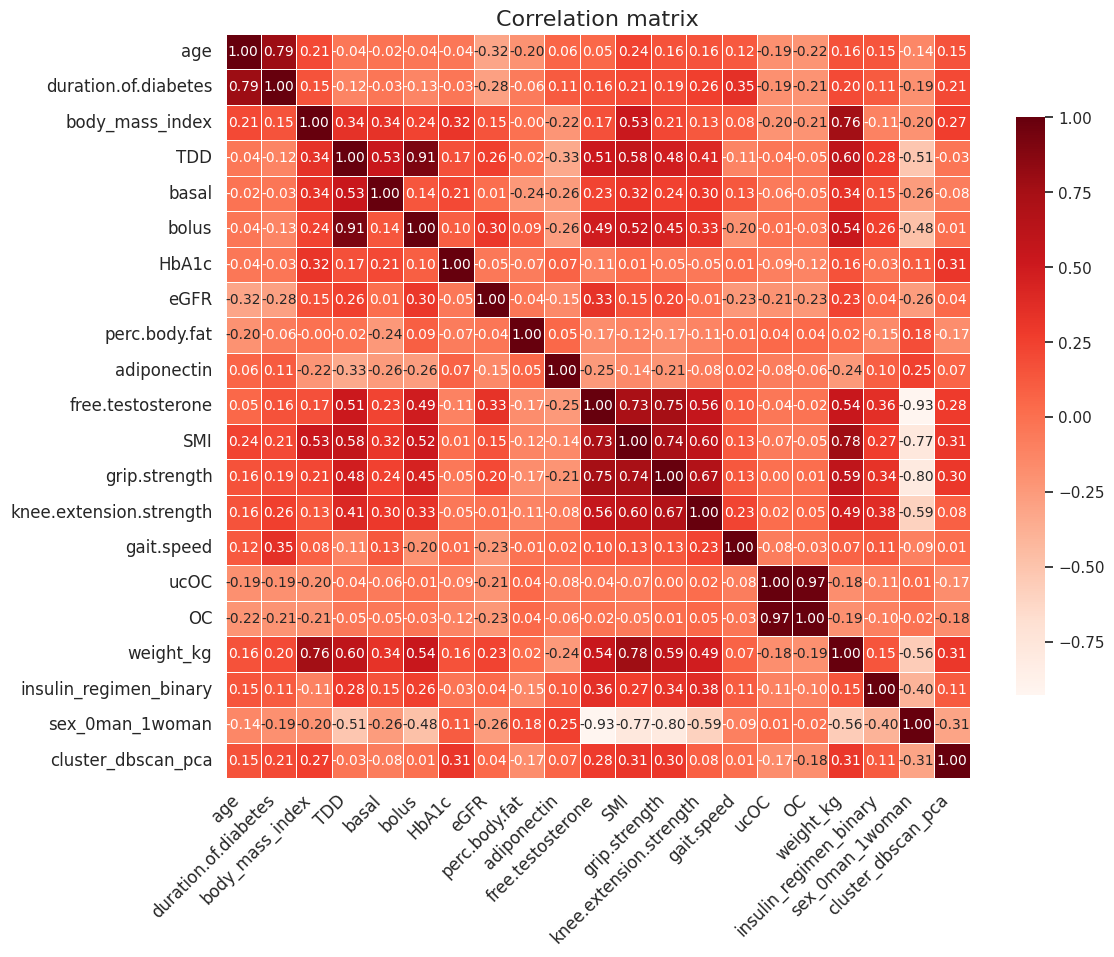

<ipython-input-30-23a059f3ecee>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Duration', y='Frequency', data=duration_df, palette='viridis', edgecolor='black')


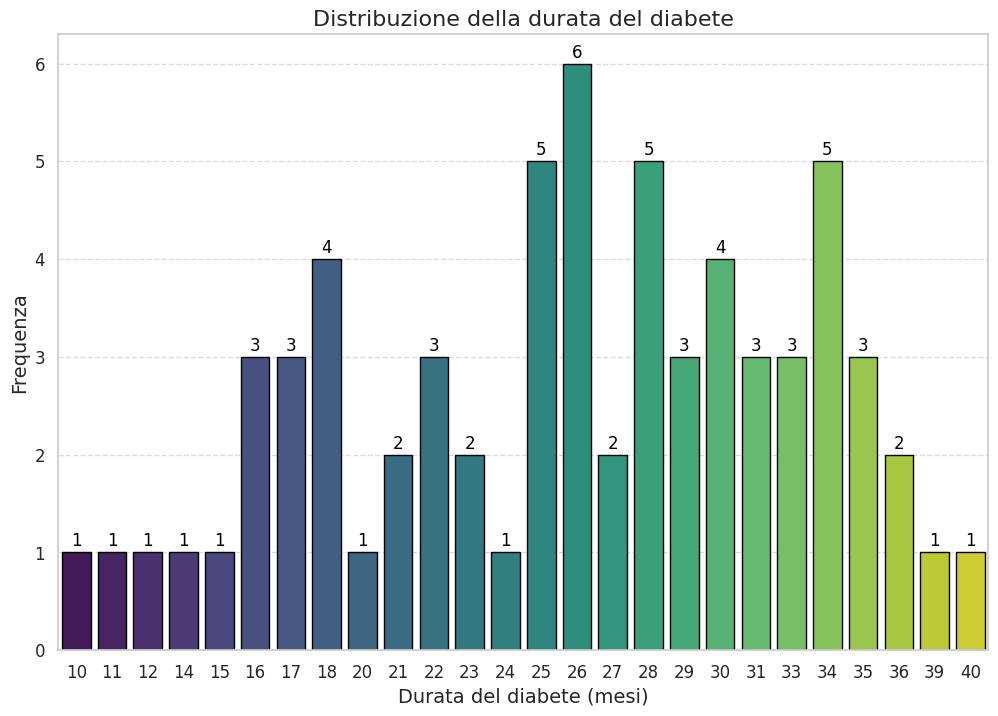

In [ ]:
diabetes = diabetes.dropna(thresh=neuroblastoma.shape[1] - 2)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes.corr(), annot=True, cmap='Reds',
            annot_kws={"size": 10}, linewidths=.5, fmt='.2f',
            square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.show()

diabetes['duration.of.diabetes'] = pd.to_numeric(diabetes['duration.of.diabetes'], errors='coerce')


duration_counts = diabetes['duration.of.diabetes'].value_counts().sort_index()

duration_df = pd.DataFrame({
    'Duration': duration_counts.index,
    'Frequency': duration_counts.values
})

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Duration', y='Frequency', data=duration_df, palette='viridis', edgecolor='black')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 8),
                     textcoords = 'offset points',
                     fontsize=12, color='black')

plt.title("Distribuzione della durata del diabete", fontsize=16)
plt.xlabel("Durata del diabete (mesi)", fontsize=14)
plt.ylabel("Frequenza", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Best DBCV Score: 0.6639
Best Parameters: min_cluster_size = 5, cluster_selection_epsilon = 0.01
DBCV Score with PCA: 0.664


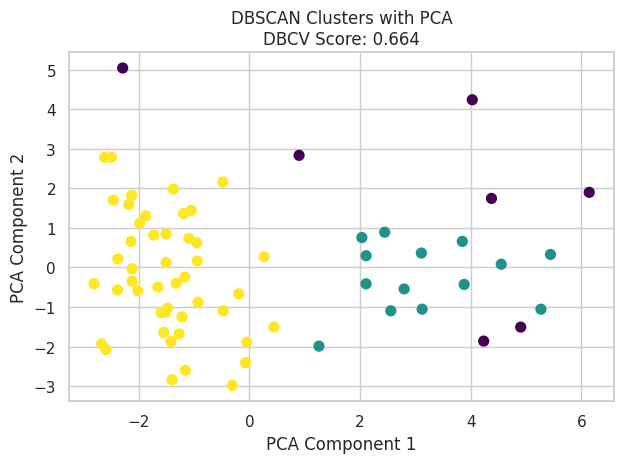

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diabetes)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

best_params = grid_search_hdbscan(X_pca, min_cluster_size_range, cluster_selection_epsilon_range)

dbscan_pca = hdbscan.HDBSCAN(min_cluster_size=best_params['min_cluster_size'], cluster_selection_epsilon=best_params['cluster_selection_epsilon'])
clusters_pca = dbscan_pca.fit_predict(X_pca)

diabetes['cluster_dbscan_pca'] = clusters_pca

if len(set(clusters_pca)) > 1:
    dbcv_score_pca = dbcv(X_pca, clusters_pca)
    print(f"DBCV Score with PCA: {dbcv_score_pca:.3f}")
else:
    print("Only one cluster found with PCA, DBCV score is not applicable.")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.title(f'DBSCAN Clusters with PCA\nDBCV Score: {dbcv_score_pca:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


#**Sepsis**

Il dataset sembra riguardare pazienti con sepsi o SIRS (Sindrome da Risposta Infiammatoria Sistemica). Ecco la spiegazione delle colonne:

Age: L'età del paziente in anni.

sex_woman: Una variabile binaria che indica il sesso del paziente, dove 0 rappresenta un uomo e 1 una donna.

diagnosis_0EC_1M_2_AC: Codifica della diagnosi del paziente, dove:

0 indica "EC",
1 indica "M" ,
2 indica "AC".

APACHE II: Il punteggio APACHE II (Acute Physiology and Chronic Health Evaluation II), una scala di gravità che valuta la gravità della malattia critica del paziente, utilizzata per predire la mortalità.

SOFA: Il punteggio SOFA (Sequential Organ Failure Assessment), un indicatore della disfunzione organica e del rischio di mortalità nei pazienti critici.

CRP: Il livello di Proteina C-Reattiva (CRP) nel sangue, un marker di infiammazione.

WBCC: Il conteggio dei globuli bianchi (White Blood Cell Count, WBCC), che misura il numero totale di globuli bianchi per microlitro di sangue.

NeuC: Il conteggio dei neutrofili (Neutrophil Count), una sottopopolazione di globuli bianchi responsabili della risposta immunitaria primaria.

LymC: Il conteggio dei linfociti (Lymphocyte Count), un tipo di globuli bianchi importante per la risposta immunitaria adattativa.

EOC: Il conteggio degli eosinofili (Eosinophil Count), un tipo di globuli bianchi coinvolti nella risposta allergica e nelle infezioni parassitarie.

NLCR: Il rapporto neutrofili-linfociti (Neutrophil-to-Lymphocyte Count Ratio), un indice infiammatorio usato per valutare la risposta infiammatoria e il rischio di mortalità.

PLTC: Il conteggio delle piastrine (Platelet Count), un indicatore della capacità del sangue di coagulare.

MPV: Il volume piastrinico medio (Mean Platelet Volume), un indice della dimensione media delle piastrine, che può indicare attivazione piastrinica.

Group: Una variabile che potrebbe indicare il gruppo di studio o la categoria a cui il paziente appartiene.

LOS-ICU: La durata della permanenza in terapia intensiva (Length of Stay in ICU), espressa in giorni.

Mortality: Una variabile binaria che indica l'esito di mortalità del paziente durante il periodo di studio, dove 0 rappresenta la sopravvivenza e 1 il decesso.

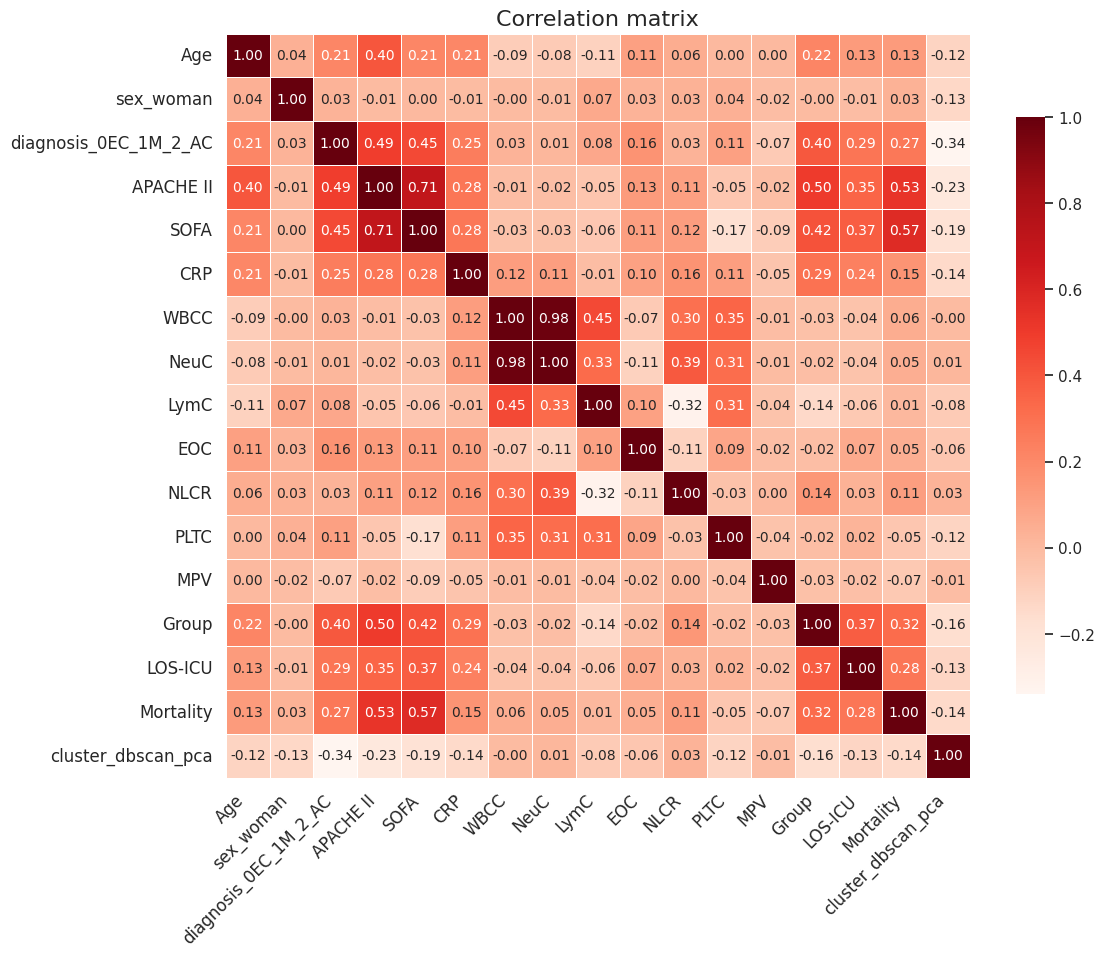

<ipython-input-32-1fa7530a3eeb>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Mortality', y='Frequenza', data=mortality_df, palette='viridis', edgecolor='black')


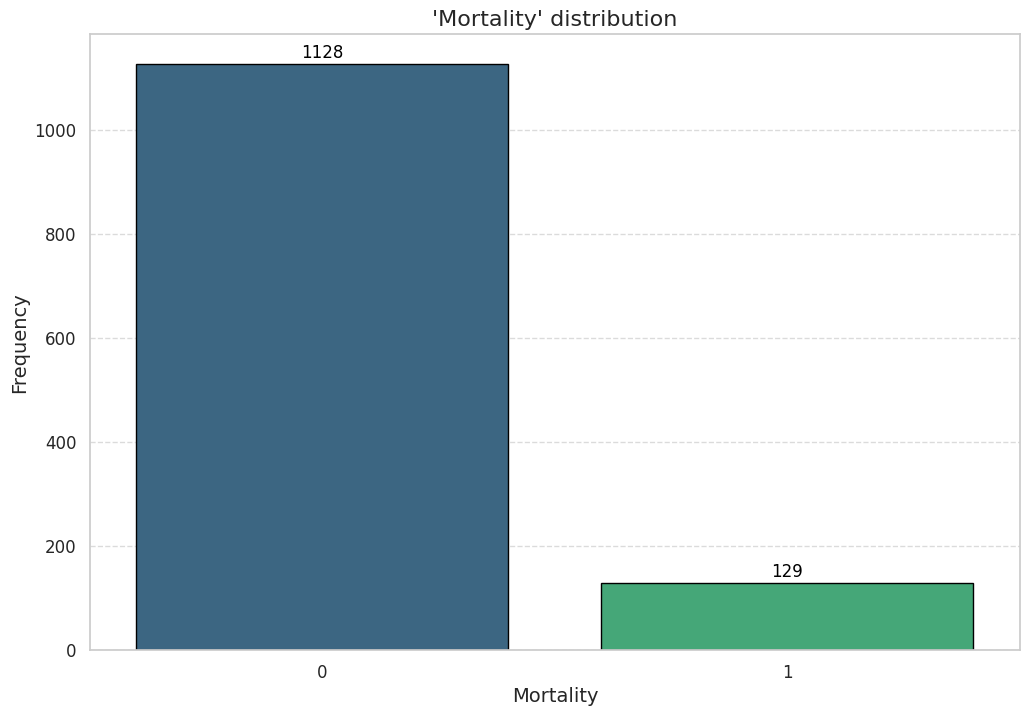

In [ ]:
sepsis = sepsis.dropna(thresh=sepsis.shape[1] - 2)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(sepsis.corr(), annot=True, cmap='Reds',
            annot_kws={"size": 10}, linewidths=.5, fmt='.2f',
            square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.show()

outcome_counts = sepsis['Mortality'].value_counts().sort_index()

mortality_df = pd.DataFrame({
    'Mortality': outcome_counts.index,
    'Frequenza': outcome_counts.values
})

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Mortality', y='Frequenza', data=mortality_df, palette='viridis', edgecolor='black')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 8),
                     textcoords = 'offset points',
                     fontsize=12, color='black')

plt.title("'Mortality' distribution", fontsize=16)
plt.xlabel("Mortality", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Best DBCV Score: 0.4132
Best Parameters: min_cluster_size = 3, cluster_selection_epsilon = 0.01
DBCV Score with PCA: 0.422


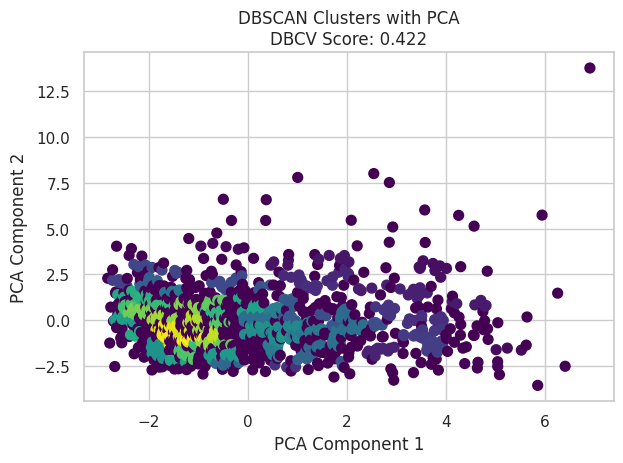

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sepsis)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


best_params = grid_search_hdbscan(X_pca, min_cluster_size_range, cluster_selection_epsilon_range)

dbscan_pca = hdbscan.HDBSCAN(min_cluster_size=best_params['min_cluster_size'], cluster_selection_epsilon=best_params['cluster_selection_epsilon'])
clusters_pca = dbscan_pca.fit_predict(X_pca)


X_pca_unique, unique_indices = np.unique(X_pca, axis=0, return_index=True)
clusters_pca_unique = clusters_pca[unique_indices]
duplicated_indices = np.setdiff1d(np.arange(X_pca.shape[0]), unique_indices)

sepsis['cluster_dbscan_pca'] = clusters_pca_unique

if len(set(clusters_pca)) > 1:
    dbcv_score_pca = dbcv(X_pca_unique, clusters_pca_unique)
    print(f"DBCV Score with PCA: {dbcv_score_pca:.3f}")
else:
    print("Only one cluster found with PCA, DBCV score is not applicable.")

plt.scatter(X_pca_unique[:, 0], X_pca_unique[:, 1], c=clusters_pca_unique, cmap='viridis', s=50)
plt.title(f'DBSCAN Clusters with PCA\nDBCV Score: {dbcv_score_pca:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

#**Heart failure**

Il dataset sembra riguardare pazienti con insufficienza cardiaca e depressione. Di seguito la spiegazione delle colonne:

id: Un identificatore univoco per ogni paziente.

Age (years): L'età del paziente in anni.

Male (1=Yes, 0=No): Una variabile binaria che indica il sesso del paziente, dove 1 rappresenta un uomo e 0 una donna.

PHQ-9: Il punteggio della Patient Health Questionnaire-9, uno strumento di screening utilizzato per misurare la gravità della depressione. Valori più alti indicano una depressione più grave.

Systolic BP (mm Hg): La pressione arteriosa sistolica del paziente, misurata in millimetri di mercurio (mm Hg). È la pressione nelle arterie quando il cuore si contrae.

Estimated glomerular filtration rate: Il tasso di filtrazione glomerulare stimato (eGFR), un indicatore della funzionalità renale².

Ejection fraction (%): La frazione di eiezione, che misura la percentuale di sangue che il ventricolo sinistro espelle dal cuore ad ogni contrazione. È un indicatore della funzione cardiaca.

Serum sodium (mmol/l): Il livello di sodio nel sangue, misurato in millimoli per litro (mmol/l).

Blood urea nitrogen (mg/dl): Il livello di azoto ureico nel sangue, misurato in milligrammi per decilitro (mg/dl).

Etiology HF (1=Yes, 0=No): Una variabile binaria che indica se l'insufficienza cardiaca del paziente ha una causa specifica (1=Yes) o meno (0=No).

Prior diabetes mellitus: Una variabile binaria che indica se il paziente ha una storia di diabete mellito (1=Yes) o no (0=No).

Elevated level of BNP/NT-BNP (1=Yes, 0=No): Una variabile binaria che indica se i livelli di BNP (Brain Natriuretic Peptide) o NT-proBNP (N-Terminal pro B-type Natriuretic Peptide) sono elevati

Time from HF to Death (days): Il tempo in giorni tra la diagnosi di insufficienza cardiaca e il decesso del paziente.

Death (1=Yes, 0=No): Una variabile binaria che indica se il paziente è deceduto (1=Yes) o è sopravvissuto (0=No) durante il periodo di studio.

Time from HF to hospitalization (days): Il tempo in giorni tra la diagnosi di insufficienza cardiaca e la successiva ospedalizzazione.

Hospitalized (1=Yes, 0=No): Una variabile binaria che indica se il paziente è stato ospedalizzato (1=Yes) o no (0=No) durante il periodo di studio.

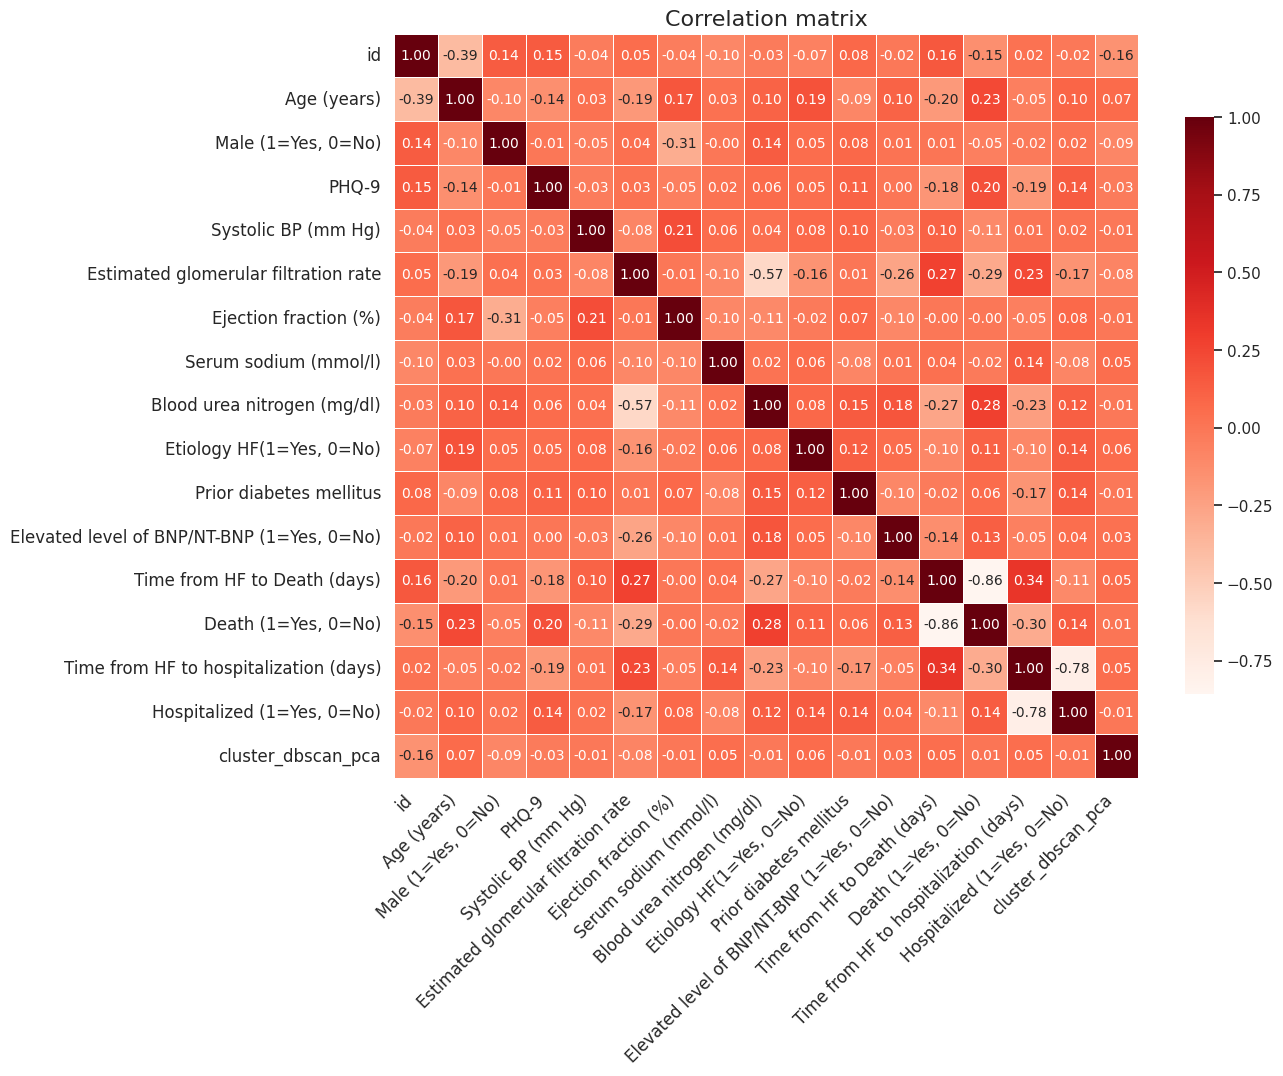

<ipython-input-34-8d384db26d4a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Death', y='Frequenza', data=death_df, palette='viridis', edgecolor='black')


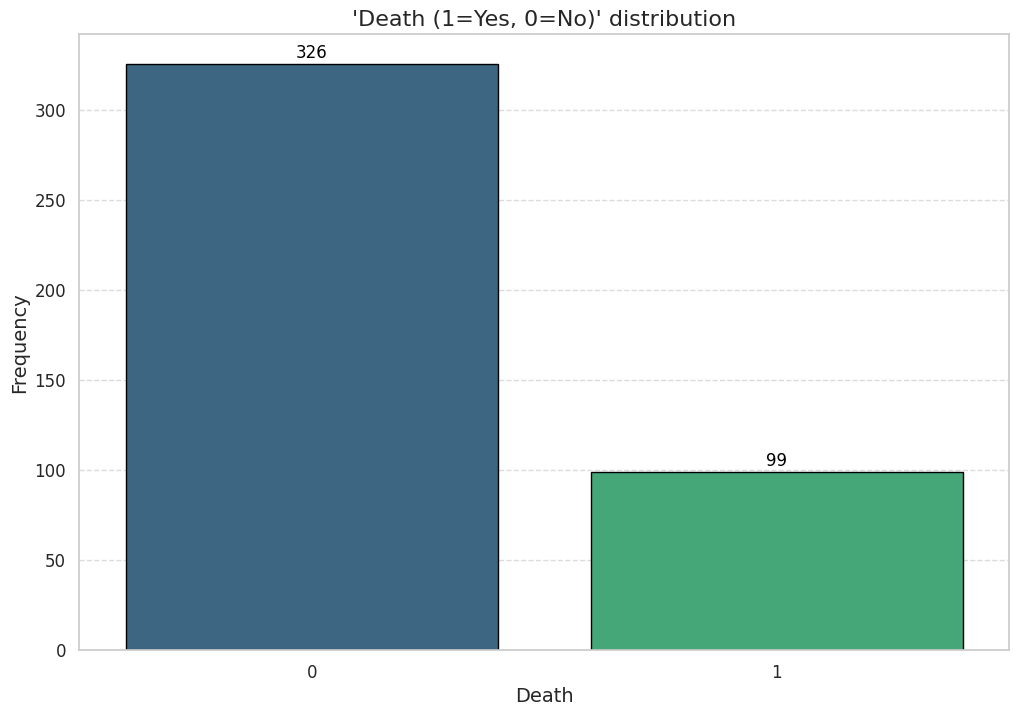

In [ ]:
heart_failure = heart_failure.dropna(thresh=heart_failure.shape[1] - 2)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(heart_failure.corr(), annot=True, cmap='Reds',
            annot_kws={"size": 10}, linewidths=.5, fmt='.2f',
            square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.show()

outcome_counts = heart_failure['Death (1=Yes, 0=No)'].value_counts().sort_index()

death_df = pd.DataFrame({
    'Death': outcome_counts.index,
    'Frequenza': outcome_counts.values
})

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Death', y='Frequenza', data=death_df, palette='viridis', edgecolor='black')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 8),
                     textcoords = 'offset points',
                     fontsize=12, color='black')

plt.title("'Death (1=Yes, 0=No)' distribution", fontsize=16)
plt.xlabel("Death", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Best DBCV Score: 0.4510
Best Parameters: min_cluster_size = 20, cluster_selection_epsilon = 0.01
DBCV Score with PCA: 0.318


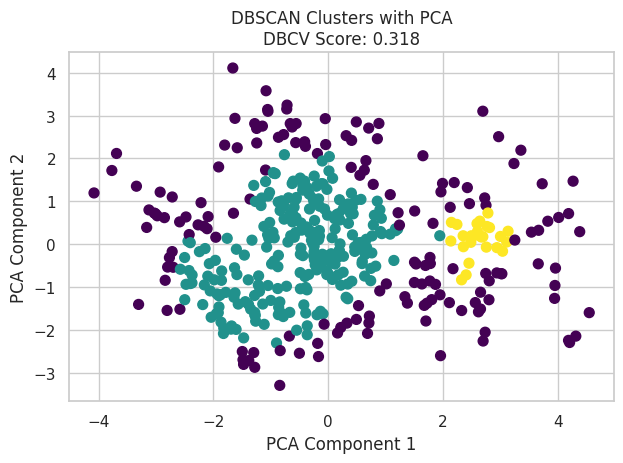

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(heart_failure)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

best_params = grid_search_hdbscan(X_pca, min_cluster_size_range, cluster_selection_epsilon_range)

dbscan_pca = hdbscan.HDBSCAN(min_cluster_size=best_params['min_cluster_size'], cluster_selection_epsilon=best_params['cluster_selection_epsilon'])
clusters_pca = dbscan_pca.fit_predict(X_pca)

X_pca_unique, unique_indices = np.unique(X_pca, axis=0, return_index=True)
clusters_pca_unique = clusters_pca[unique_indices]
duplicated_indices = np.setdiff1d(np.arange(X_pca.shape[0]), unique_indices)

heart_failure['cluster_dbscan_pca'] = clusters_pca_unique

if len(set(clusters_pca)) > 1:
    dbcv_score_pca = dbcv(X_pca_unique, clusters_pca_unique)
    print(f"DBCV Score with PCA: {dbcv_score_pca:.3f}")
else:
    print("Only one cluster found with PCA, DBCV score is not applicable.")

plt.scatter(X_pca_unique[:, 0], X_pca_unique[:, 1], c=clusters_pca_unique, cmap='viridis', s=50)
plt.title(f'DBSCAN Clusters with PCA\nDBCV Score: {dbcv_score_pca:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

#**Cardiac arrest**

Il dataset sembra contenere informazioni su pazienti con arresto cardiaco in Spagna. Di seguito è riportata la spiegazione delle colonne:

Exitus: Una variabile binaria che indica l'esito del paziente.

sex_woman: Una variabile binaria che indica il sesso del paziente.

Age_years: L'età del paziente in anni.

Endotracheal_intubation: Una variabile binaria che indica se il paziente è stato sottoposto a intubazione endotracheale durante l'arresto cardiaco.

Functional_status: Un punteggio o categoria che indica lo stato funzionale del paziente prima dell'arresto cardiaco. Questo potrebbe essere un indicatore della capacità del paziente di svolgere attività quotidiane o del grado di disabilità.

Asystole: Una variabile binaria che indica se il ritmo cardiaco al momento dell'arresto era l'asistolia.

Cardiac_arrest_at_home: Una variabile binaria che indica se l'arresto cardiaco si è verificato a casa del paziente.

Bystander: Una variabile binaria che indica se c'era un testimone presente durante l'arresto cardiaco.

Time_min: Il tempo trascorso in minuti dall'insorgenza dell'arresto cardiaco fino al primo intervento o all'arrivo dei soccorsi.

Cardiogenic: Una variabile binaria che indica se la causa dell'arresto cardiaco era cardiogena.

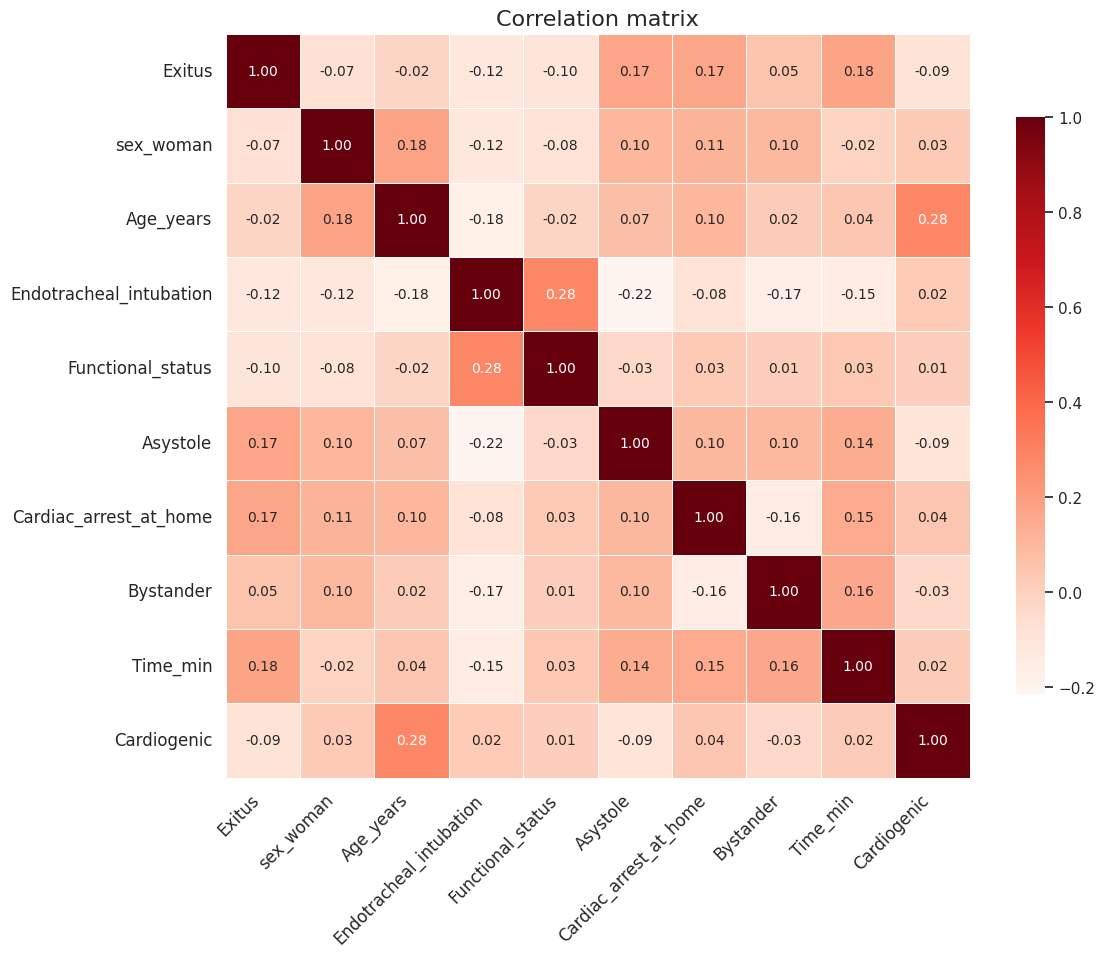

<ipython-input-36-117524c9d82b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Cardiogenic', y='Frequenza', data=Cardiogenic_df, palette='viridis', edgecolor='black')


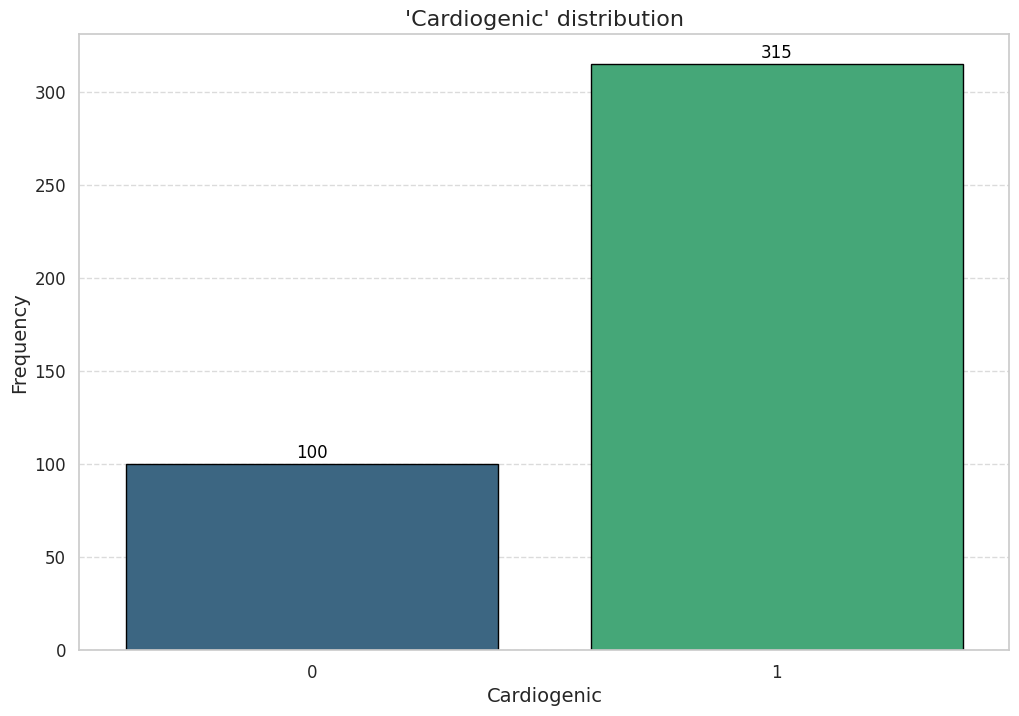

In [ ]:
cardiac_arrest = cardiac_arrest.dropna(thresh=cardiac_arrest.shape[1])

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(cardiac_arrest.corr(), annot=True, cmap='Reds',
            annot_kws={"size": 10}, linewidths=.5, fmt='.2f',
            square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.show()

outcome_counts = cardiac_arrest['Cardiogenic'].value_counts().sort_index()

Cardiogenic_df = pd.DataFrame({
    'Cardiogenic': outcome_counts.index,
    'Frequenza': outcome_counts.values
})

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Cardiogenic', y='Frequenza', data=Cardiogenic_df, palette='viridis', edgecolor='black')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 8),
                     textcoords = 'offset points',
                     fontsize=12, color='black')

plt.title("'Cardiogenic' distribution", fontsize=16)
plt.xlabel("Cardiogenic", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Best DBCV Score: 0.3745
Best Parameters: min_cluster_size = 3, cluster_selection_epsilon = 0.01
DBCV Score with PCA: 0.343


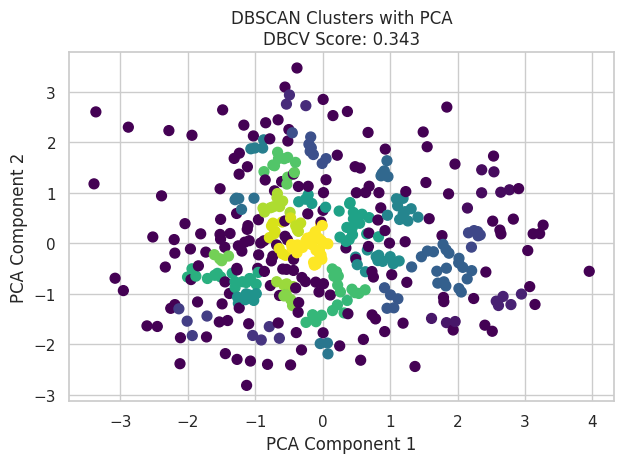

In [ ]:
cardiac_arrest=cardiac_arrest.drop(cardiac_arrest.index[386])
cardiac_arrest=cardiac_arrest.drop(cardiac_arrest.index[387])
cardiac_arrest=cardiac_arrest.drop(cardiac_arrest.index[388])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cardiac_arrest)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


best_params = grid_search_hdbscan(X_pca, min_cluster_size_range, cluster_selection_epsilon_range)

dbscan_pca = hdbscan.HDBSCAN(min_cluster_size=best_params['min_cluster_size'], cluster_selection_epsilon=best_params['cluster_selection_epsilon'])
clusters_pca = dbscan_pca.fit_predict(X_pca)


X_pca_unique, unique_indices = np.unique(X_pca, axis=0, return_index=True)
clusters_pca_unique = clusters_pca[unique_indices]
duplicated_indices = np.setdiff1d(np.arange(X_pca.shape[0]), unique_indices)

cardiac_arrest['cluster_dbscan_pca'] = clusters_pca_unique

if len(set(clusters_pca)) > 1:
    dbcv_score_pca = dbcv(X_pca_unique, clusters_pca_unique)
    print(f"DBCV Score with PCA: {dbcv_score_pca:.3f}")
else:
    print("Only one cluster found with PCA, DBCV score is not applicable.")

plt.scatter(X_pca_unique[:, 0], X_pca_unique[:, 1], c=clusters_pca_unique, cmap='viridis', s=50)
plt.title(f'DBSCAN Clusters with PCA\nDBCV Score: {dbcv_score_pca:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()